In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df = pd.read_csv("./data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
df.shape

(7043, 21)

In [116]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [117]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [118]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


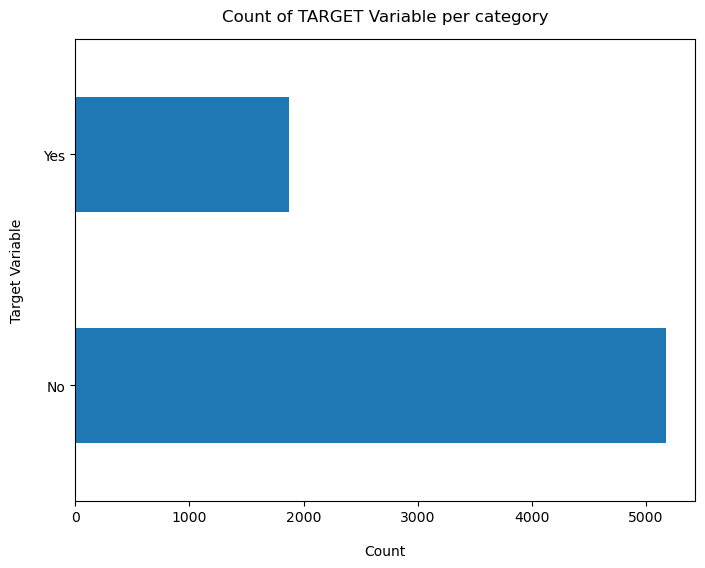

In [119]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)
plt.show()

In [120]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

### Upsampling and Downsampling

When dealing with imbalanced data, where one class (e.g., "No Churn") is significantly more frequent than the other (e.g., "Yes Churn"), it becomes important to balance the dataset to prevent the machine learning model from being biased towards the majority class. Two common techniques to address this imbalance are upsampling and downsampling.

#### 1. Upsampling

Upsampling involves increasing the number of instances of the minority class (Yes Churn) by either duplicating existing instances or generating synthetic ones (e.g., using techniques like SMOTE – Synthetic Minority Over-sampling Technique).

**Process:**

* Duplicate the minority class or create synthetic samples until both classes have an equal number of instances.

**Advantages:**

* Prevents loss of information, as all instances from the majority class are retained.
* Helps the model learn more from the minority class without reducing data from the majority class.

**Disadvantages:**

* May lead to overfitting, especially if only duplicating minority samples, as the model might memorize certain instances instead of generalizing.

#### 2. Downsampling

Downsampling involves reducing the number of instances from the majority class (No Churn) to match the size of the minority class.

**Process:**

* Randomly remove samples from the majority class to balance the dataset.

**Advantages:**

* Simpler and faster since you're working with fewer samples.
* Reduces computational resources and can help models generalize better.

**Disadvantages:**

* Can result in loss of important information from the majority class, leading to reduced model performance.

#### What to use in our dataset

**In this dataset:**

* 73.46% of the customers do not churn.
* 26.54% of the customers do churn.

Given this significant imbalance, both upsampling and downsampling can be applied to address the imbalance between the "Yes" (churn) and "No" (no churn) classes.

In a dataset of 7,000 rows with 73.46% no churn and 26.54% churn, you can use upsampling or downsampling to balance the data.

* Upsampling adds more churn cases (by duplication or synthetic generation), preserving all data but risks overfitting.
* Downsampling reduces the no-churn cases to match the churn count, which simplifies the dataset but risks losing important information.

Since the dataset is relatively small, upsampling might work better to retain data, but it’s best to test both and evaluate using metrics like accuracy, F1-score, and AUC-ROC.

#### Note

**Upsampling and downsampling** are primarily used for classification techniques where there is a need to balance classes (e.g., churn vs. no churn, fraud vs. non-fraud). These techniques focus on addressing class imbalance, which is a common challenge in classification tasks.

### Code

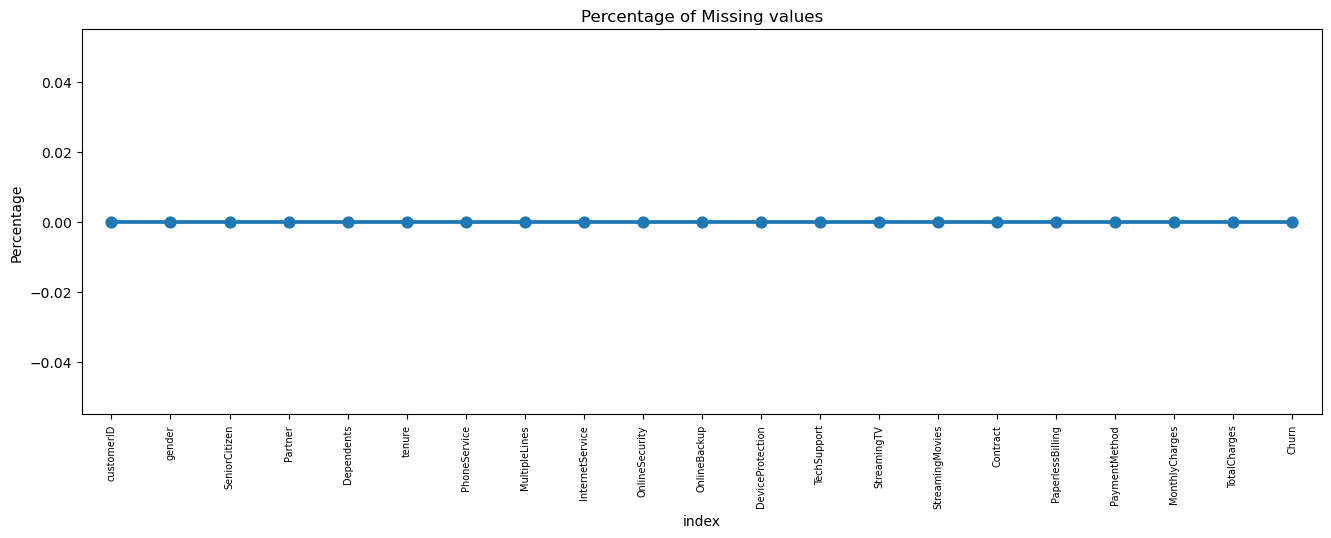

In [122]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

### Data Cleaning

In [123]:
data = df.copy()

In [124]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [125]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [126]:
data.loc[data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [127]:
data.dropna(how = 'any', inplace = True)

In [128]:
print(data['tenure'].max())

72


In [129]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [130]:
data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [131]:
data.drop(columns= ['customerID', 'tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

#### Univariate Analysis

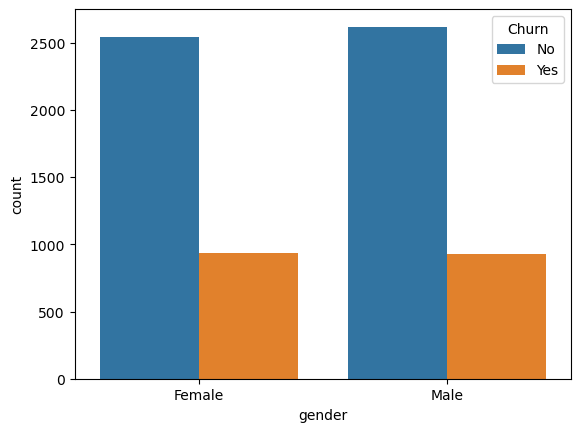

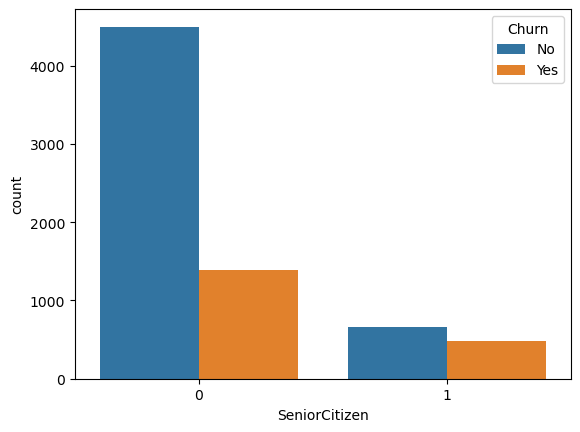

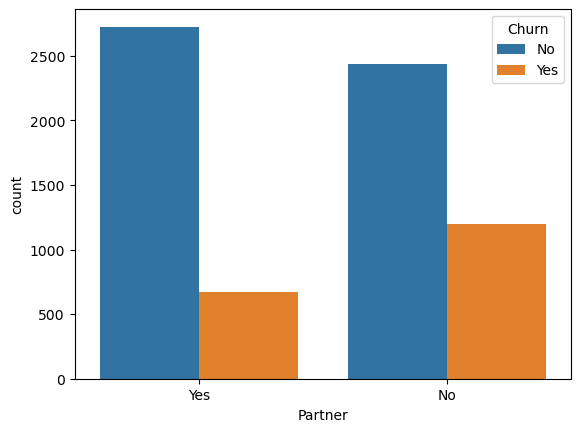

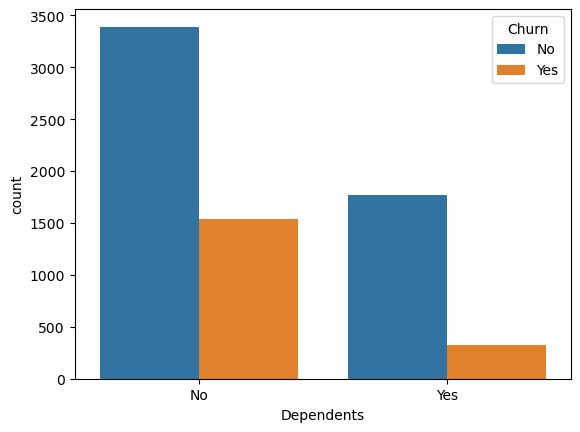

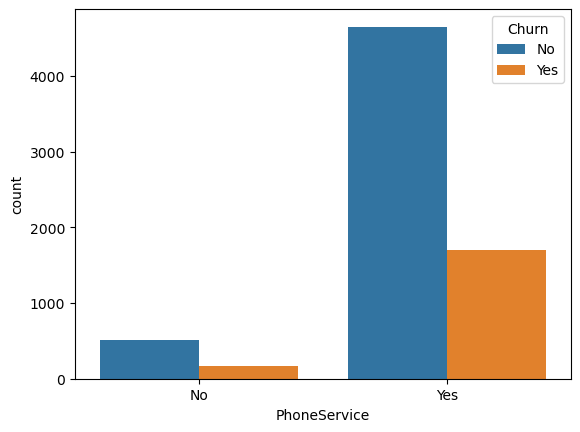

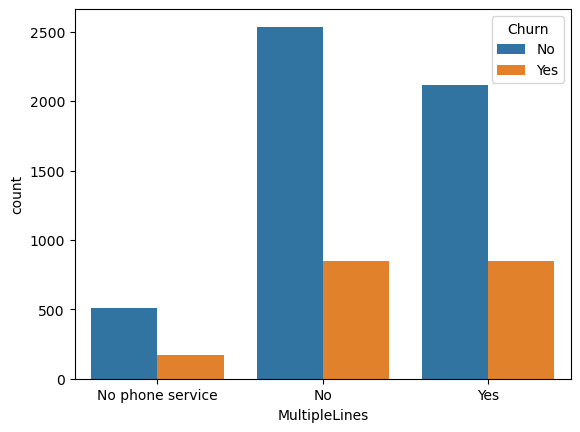

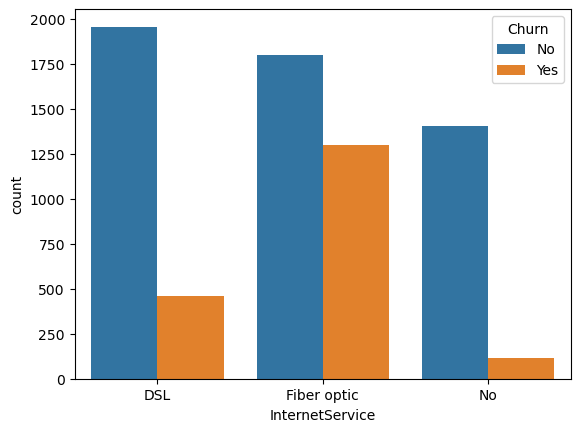

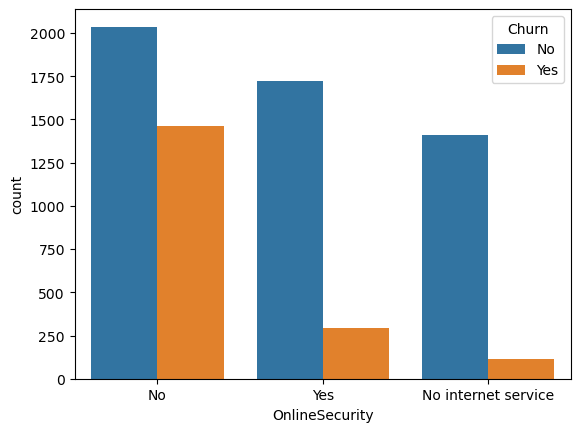

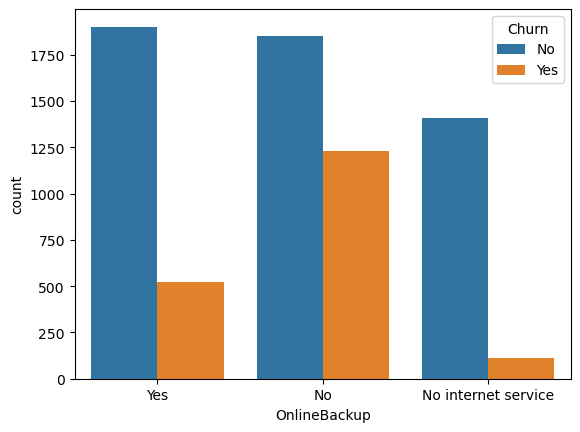

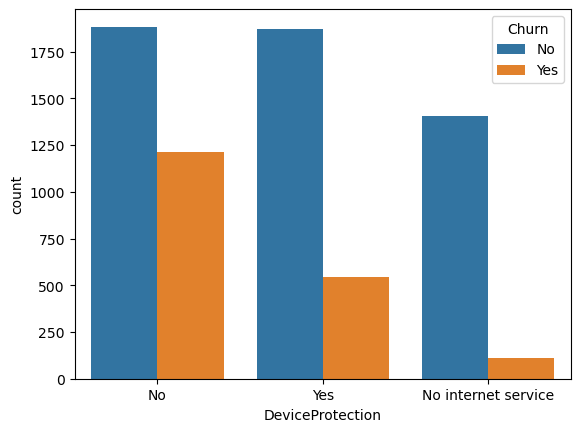

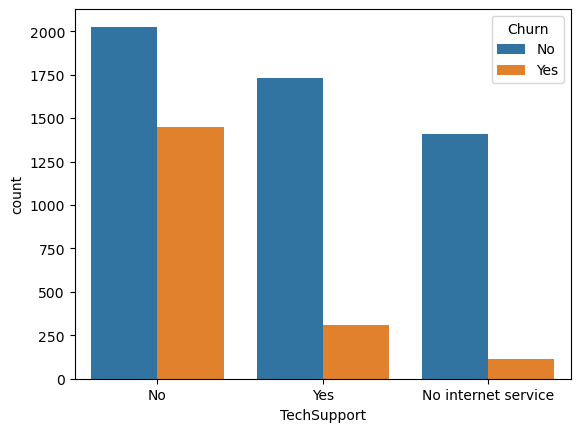

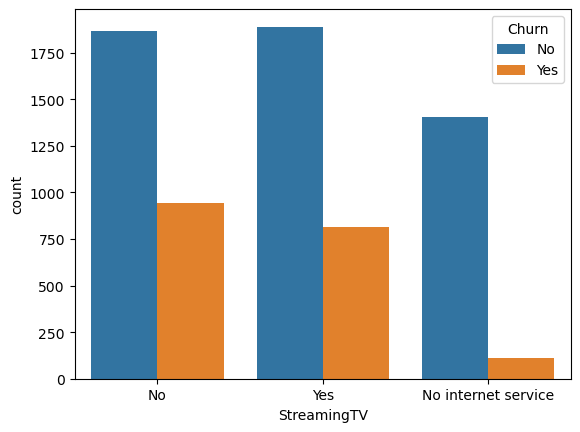

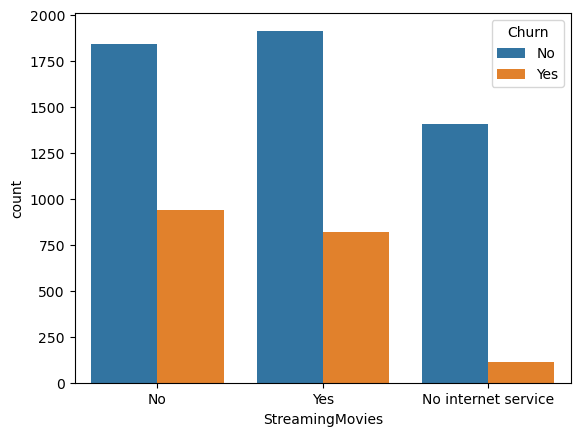

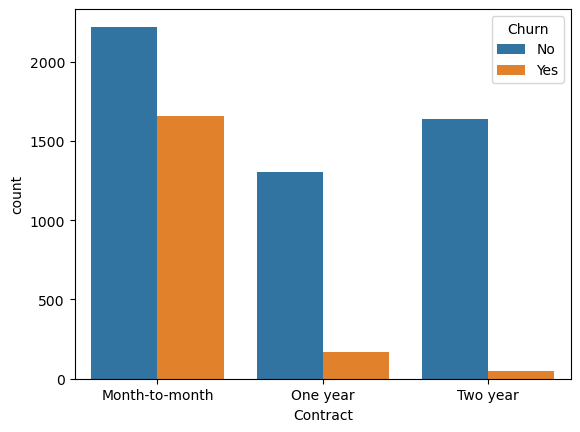

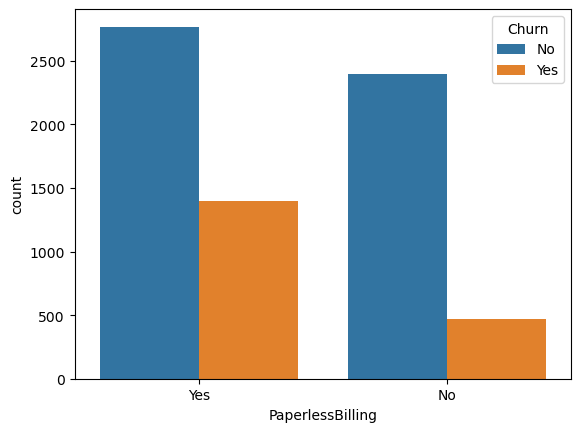

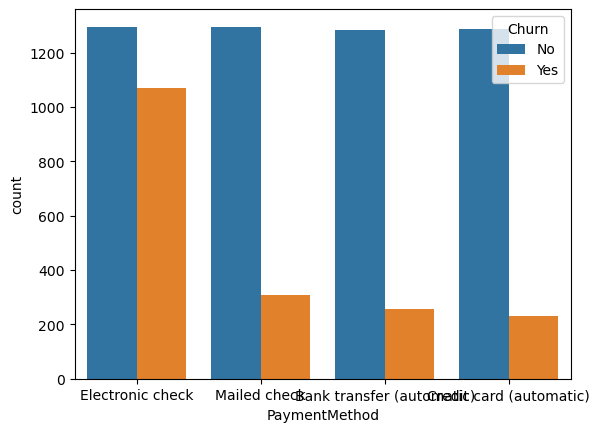

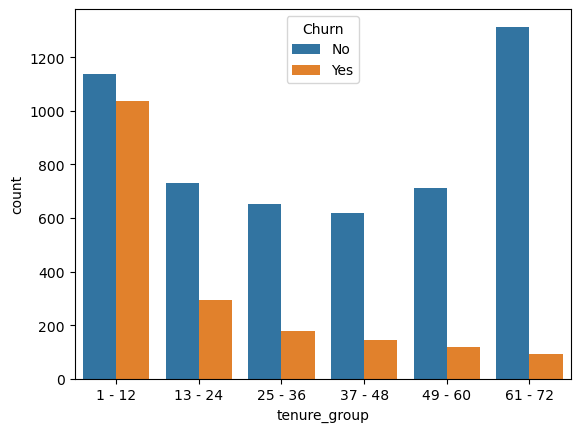

In [132]:
for i, predictors in enumerate(data.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictors, hue='Churn')
    plt.show()

In [133]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [134]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [135]:
data_dummies = pd.get_dummies(data)
data_dummies = data_dummies.astype(int)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


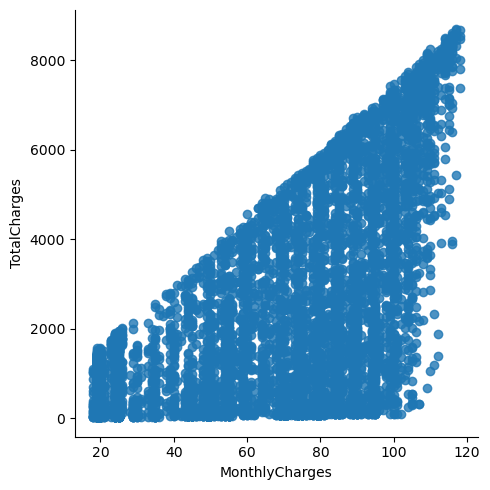

In [136]:
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_25468\2422820851.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn'] == 0)], color='Red', shade = True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_25468\2422820851.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn'] == 1)], ax=Mth, color='Blue', shade = True)


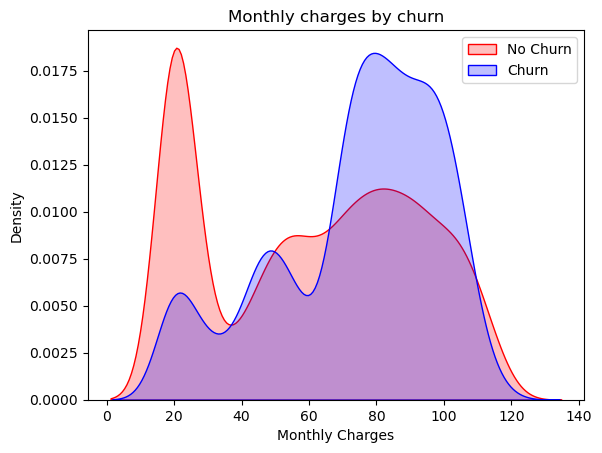

In [137]:
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn'] == 0)], color='Red', shade = True)

Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn'] == 1)], ax=Mth, color='Blue', shade = True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title('Monthly charges by churn')

plt.show()

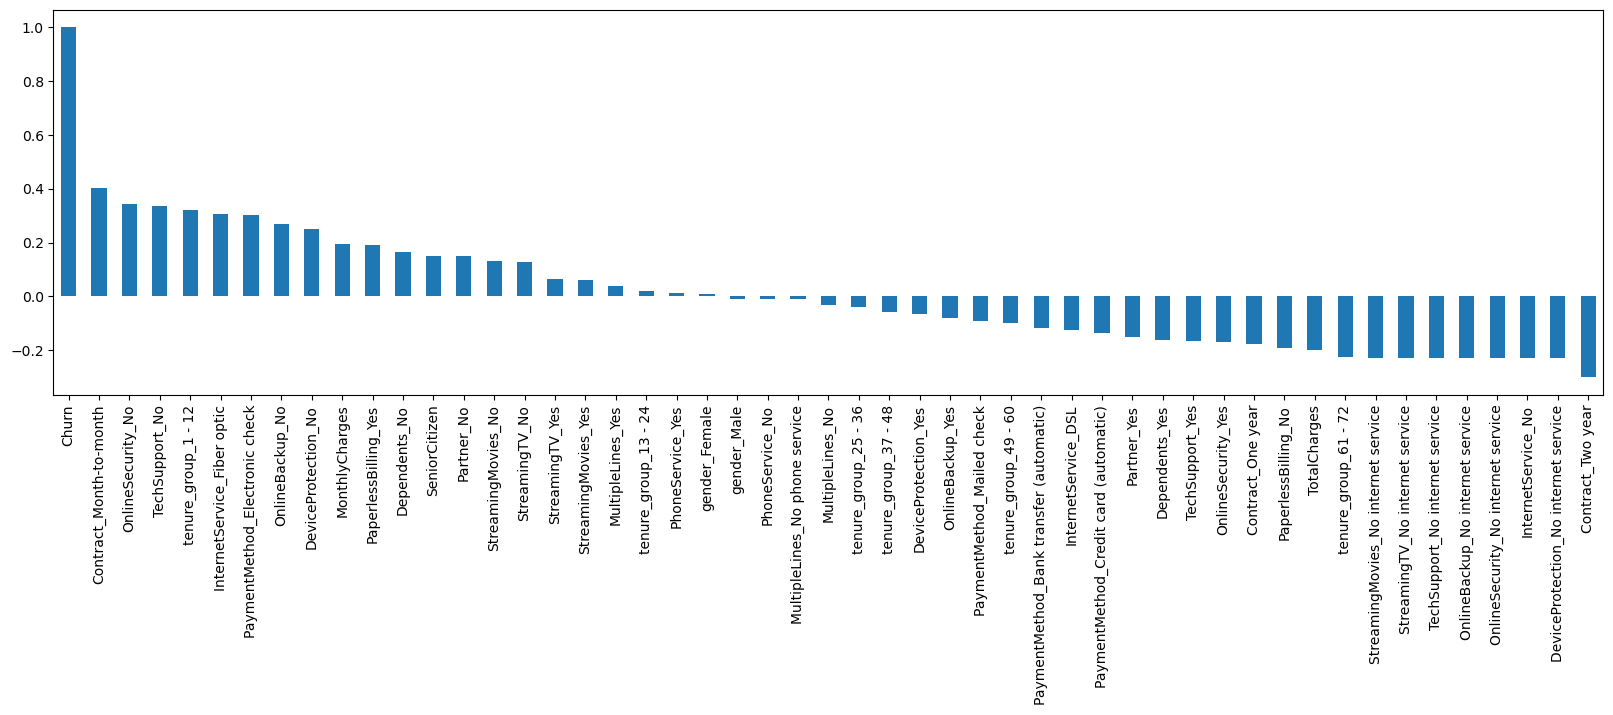

In [142]:
plt.figure(figsize=(20, 5))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### Insights about Churn from Correlation Data:

1. **Positive Correlations with Churn:**
   - **Contract_Month-to-month:** Customers with a month-to-month contract have the highest positive correlation with churn. This suggests that these customers are more likely to churn compared to those with longer contracts.
   - **OnlineSecurity_No, TechSupport_No:** Customers who don't have online security or tech support services are more likely to churn, indicating that these services could be important in retaining customers.
   - **Tenure (group 1-12 months):** Customers with a tenure between 1 and 12 months are more likely to churn, indicating that newer customers are more at risk of leaving.
   - **InternetService_Fiber optic:** Customers with fiber optic internet services show a higher correlation with churn, possibly due to service dissatisfaction or other factors.
   - **PaymentMethod_Electronic check:** Customers who use electronic checks for payment tend to churn more, suggesting that payment method convenience could impact churn.

2. **Negative Correlations with Churn:**
   - **Contract_Two year:** Having a two-year contract has a strong negative correlation with churn, meaning customers with longer-term contracts are less likely to leave.
   - **InternetService_DSL:** Customers using DSL (Digital Subscriber Line) services are less likely to churn compared to fiber optic users.
   - **SeniorCitizen, Partner_No, Dependents_No:** Interestingly, customers who are not senior citizens, do not have partners, or do not have dependents show a slight tendency to churn less. This might indicate the presence of specific demographics that are more loyal or less prone to leave.

3. **Other Insights:**
   - **MonthlyCharges and TotalCharges:** These features have a weak correlation with churn, indicating that higher or lower charges alone may not directly impact customer retention. 
   - **Streaming services (Movies, TV):** Whether a customer uses streaming services or not has a relatively minor effect on churn.

### Code

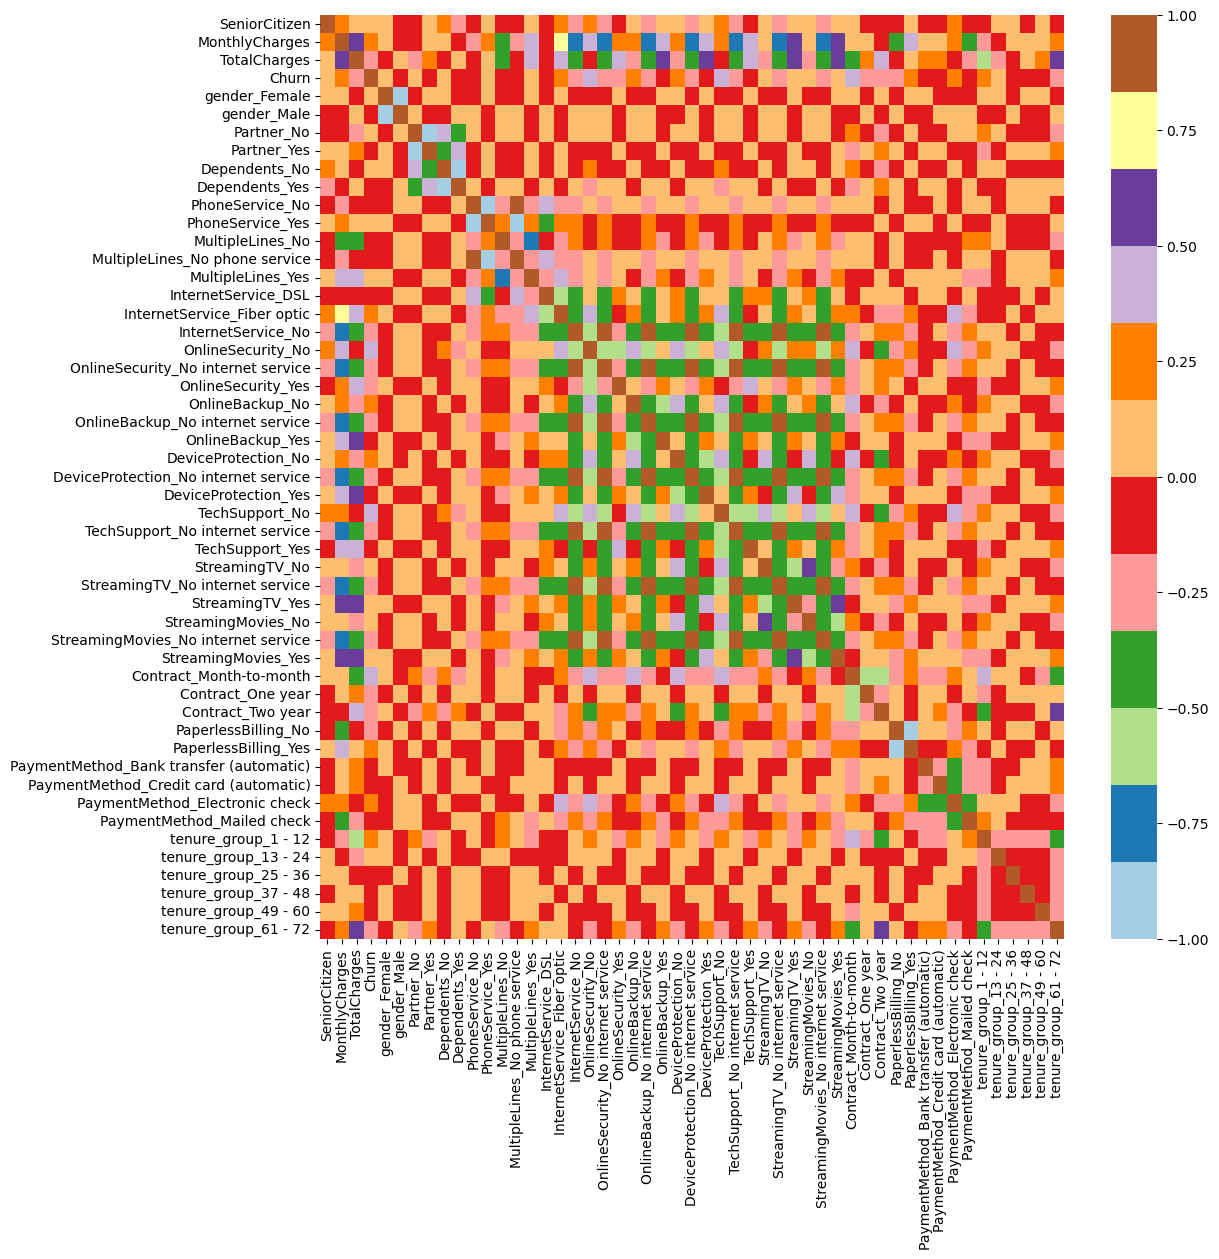

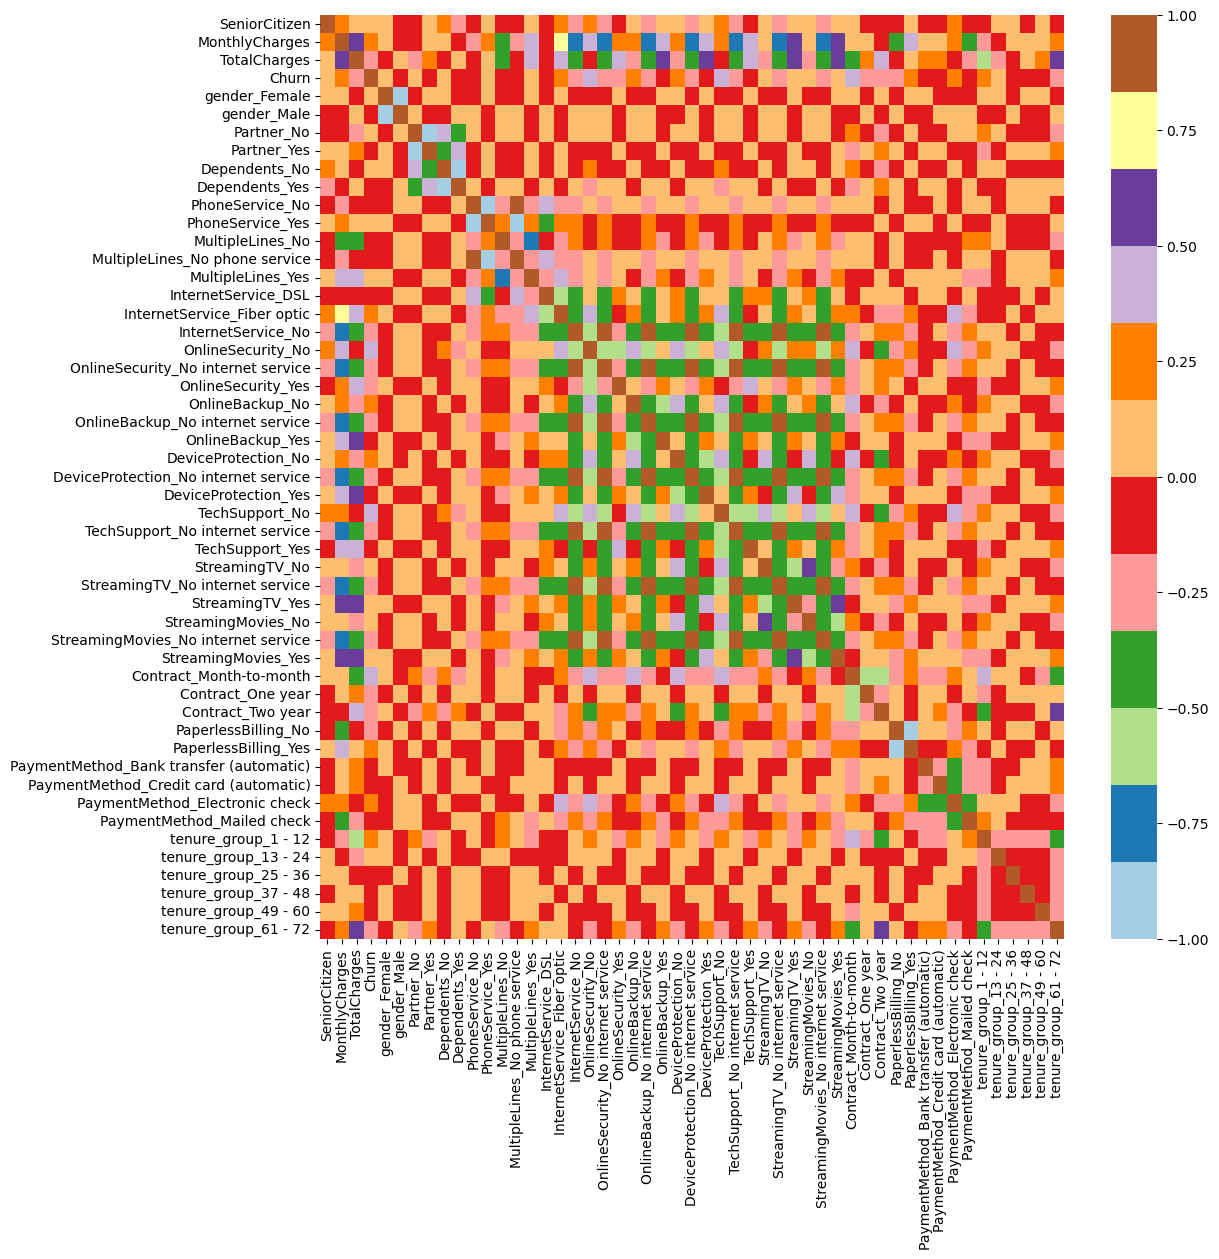

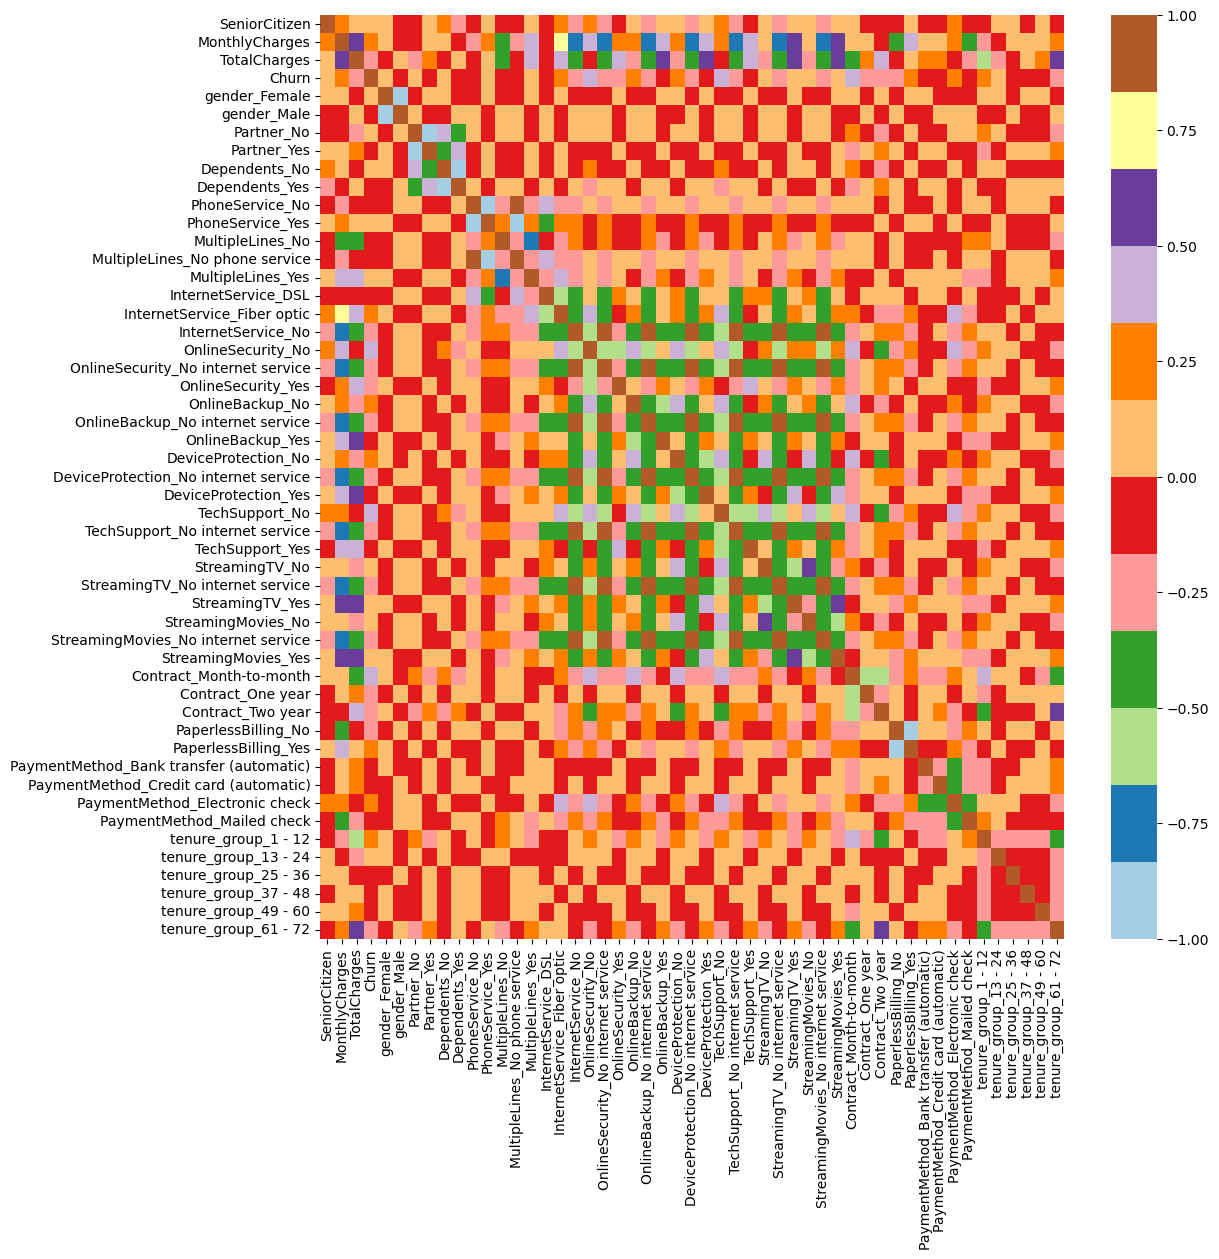

In [145]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")
plt.show()

### Bivariate Analysis

In [150]:
new_df1_target0 = data.loc[data["Churn"] == 0]
new_df1_target1 = data.loc[data["Churn"] == 1]

In [162]:
def uniplot(df, col, title, hue=None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order=df[col].value_counts().index , hue = hue, palette='bright')

    plt.show()

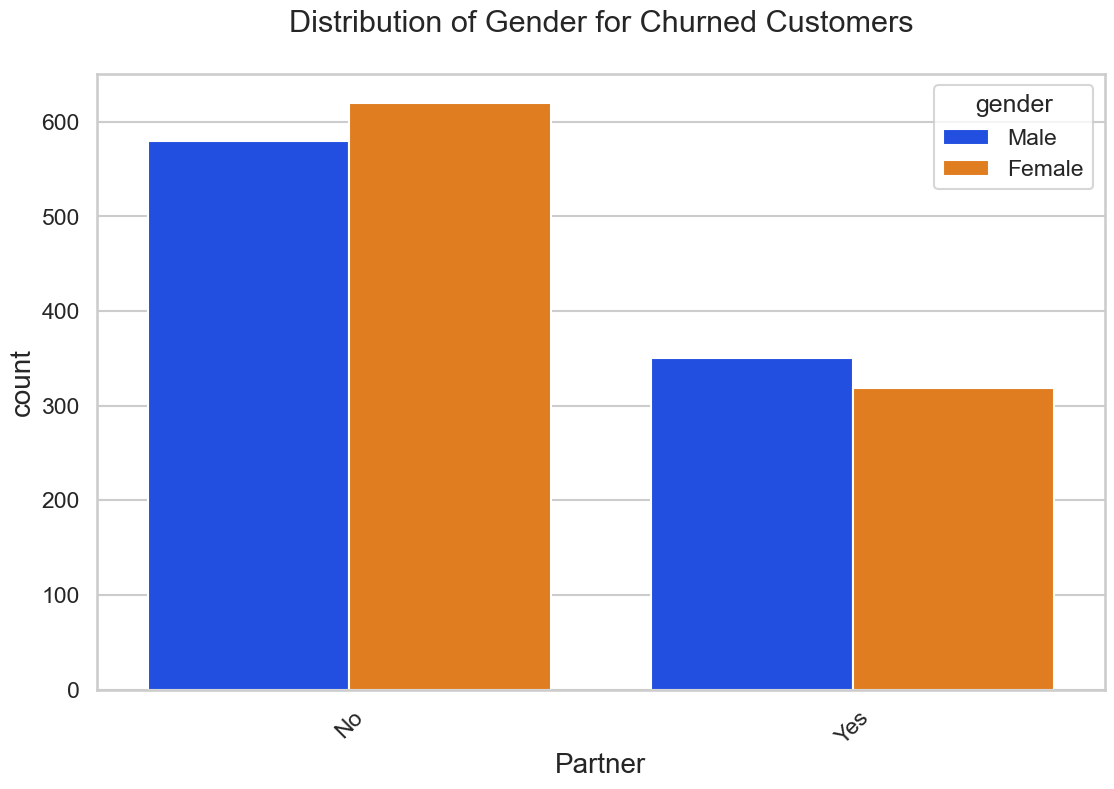

In [163]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

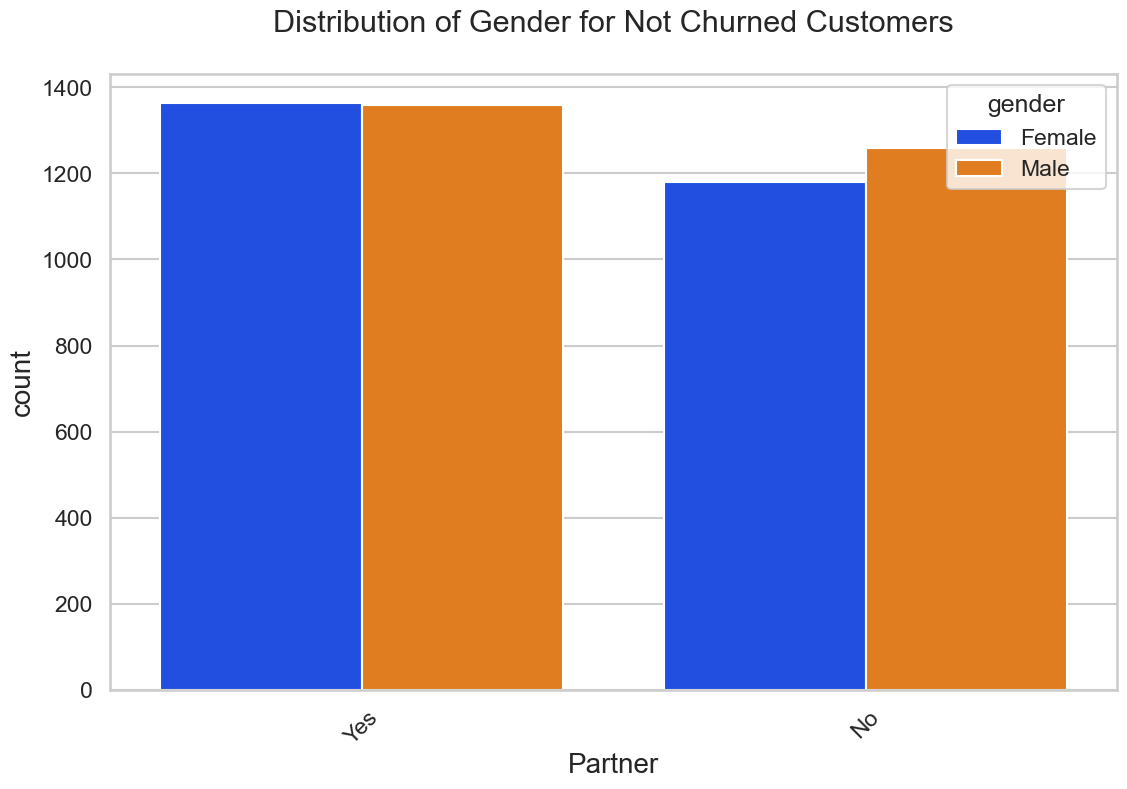

In [165]:
uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Not Churned Customers', hue='gender')

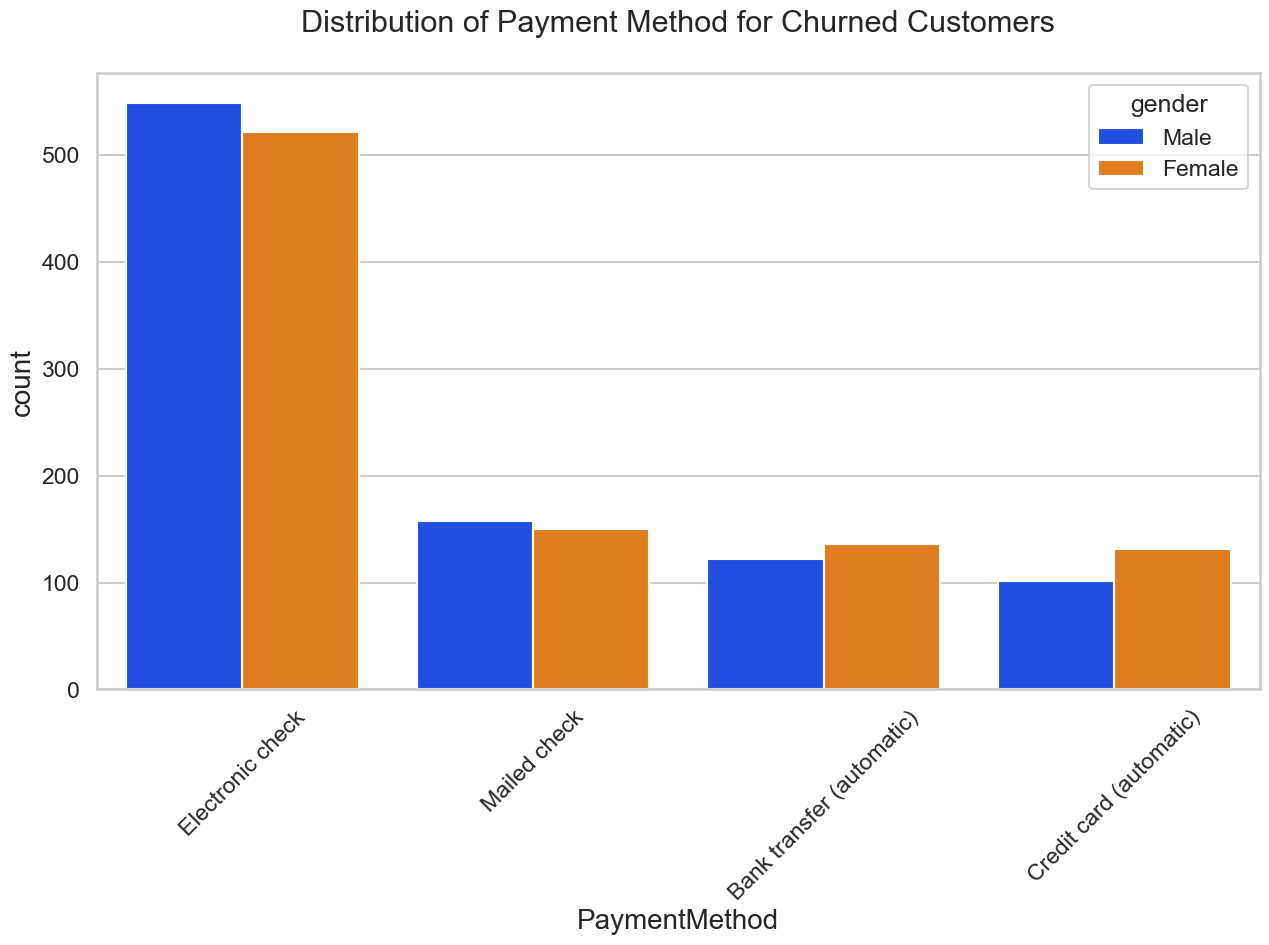

In [166]:
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers', hue='gender')

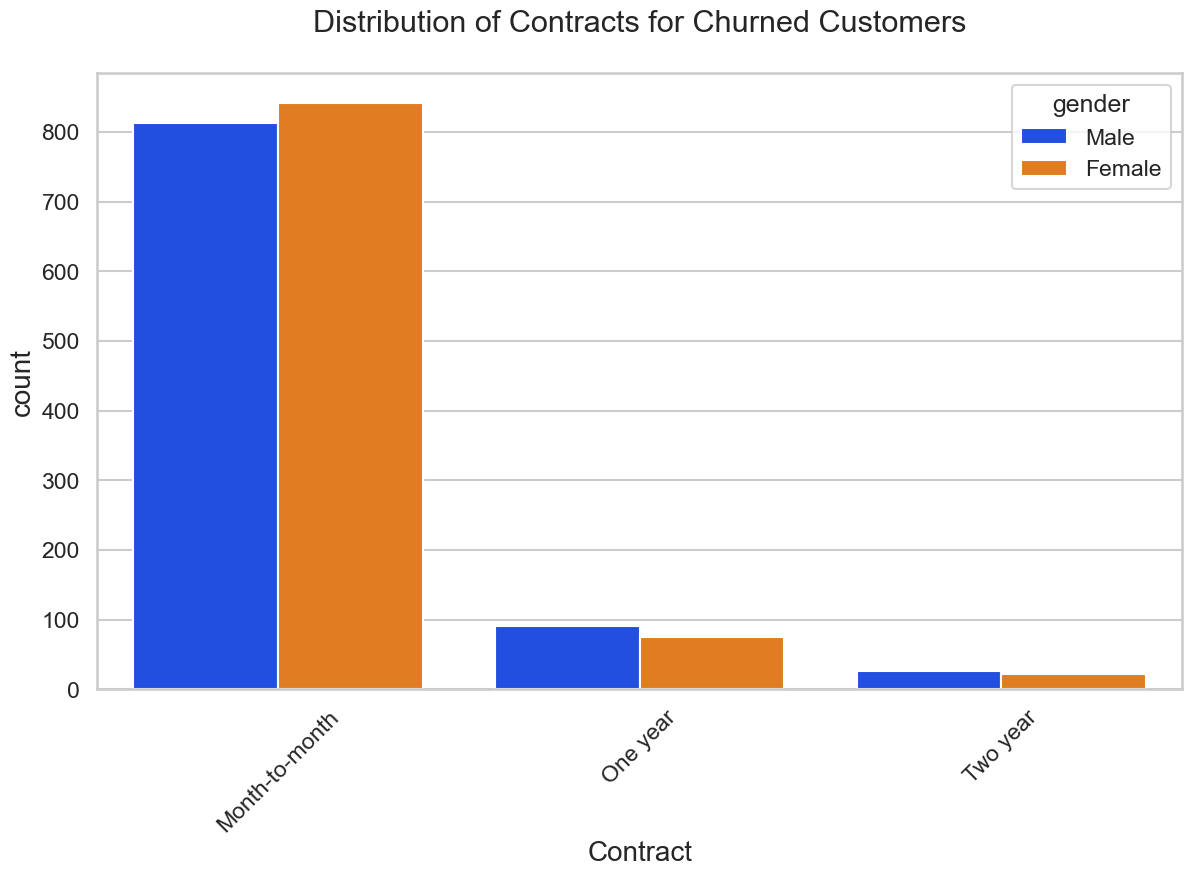

In [169]:
uniplot(new_df1_target1, col='Contract', title='Distribution of Contracts for Churned Customers', hue='gender')

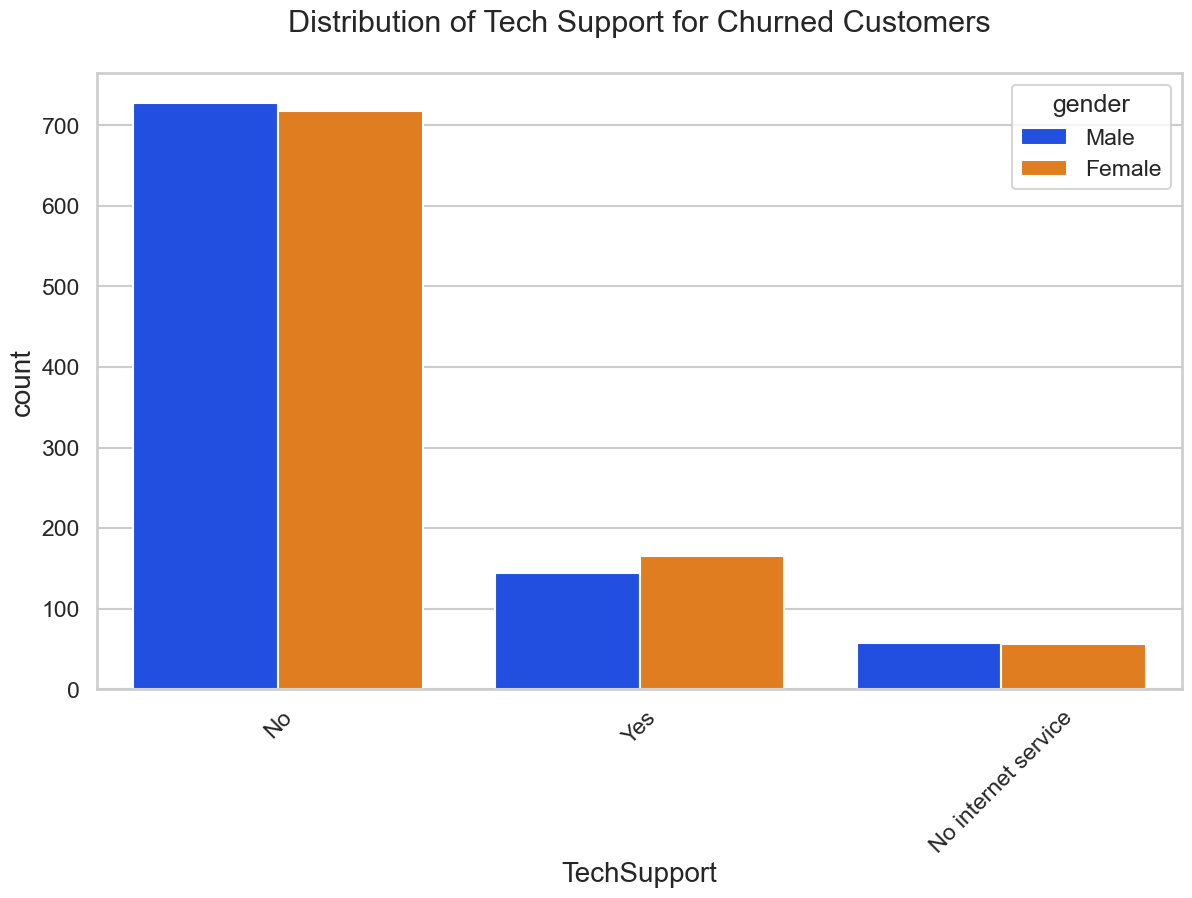

In [170]:
uniplot(new_df1_target1, col='TechSupport', title='Distribution of Tech Support for Churned Customers', hue='gender')

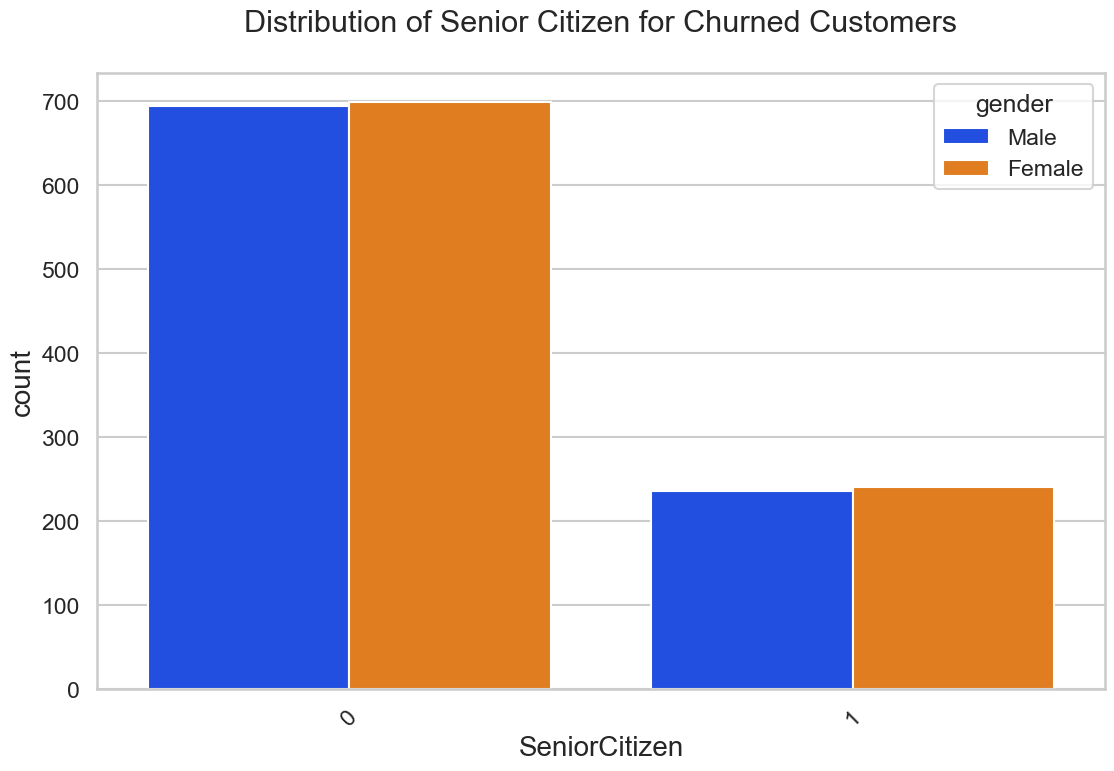

In [171]:
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of Senior Citizen for Churned Customers', hue='gender')

In [173]:
data_dummies.to_csv('./data/processed/tel_churn.csv')